In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('D:/week10 data/BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)

# Inspect the data
print(df.head())
print(df.info())


C:\Users\Robel\AppData\Local\Temp\ipykernel_14536\3384703638.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('D:/week10 data/BrentOilPrices.csv', parse_dates=['Date'], dayfirst=True)


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB
None


In [3]:
df = df.dropna()
df = df.sort_values(by='Date')

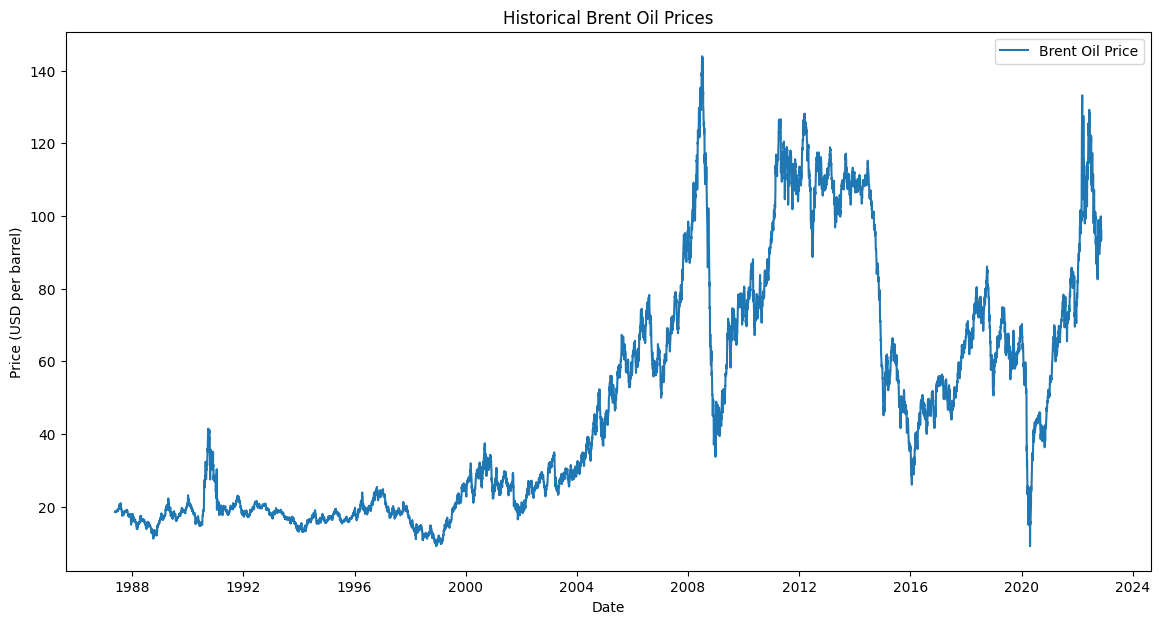

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.title('Historical Brent Oil Prices')
plt.legend()
plt.show()


In [5]:
events = {
    '2014-06-30': 'ISIS captures Mosul',
    '2016-11-30': 'OPEC agrees to cut production',
    '2020-03-09': 'Oil price war between Russia and Saudi Arabia'
}
df['Event'] = df['Date'].apply(lambda x: events.get(x.strftime('%Y-%m-%d'), ''))


In [6]:
from statsmodels.tsa.arima.model import ARIMA

# Example: Fit an ARIMA model
model = ARIMA(df['Price'], order=(5, 1, 0))
model_fit = model.fit()


In [7]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -14540.613
Date:                Wed, 19 Feb 2025   AIC                          29093.226
Time:                        23:21:23   BIC                          29135.862
Sample:                             0   HQIC                         29107.733
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0260      0.006      4.344      0.000       0.014       0.038
ar.L2         -0.0235      0.006     -4.231      0.000      -0.034      -0.013
ar.L3         -0.0071      0.005     -1.507      0.1

In [8]:
# Example: Analyze impact using model residuals
df['Residuals'] = model_fit.resid


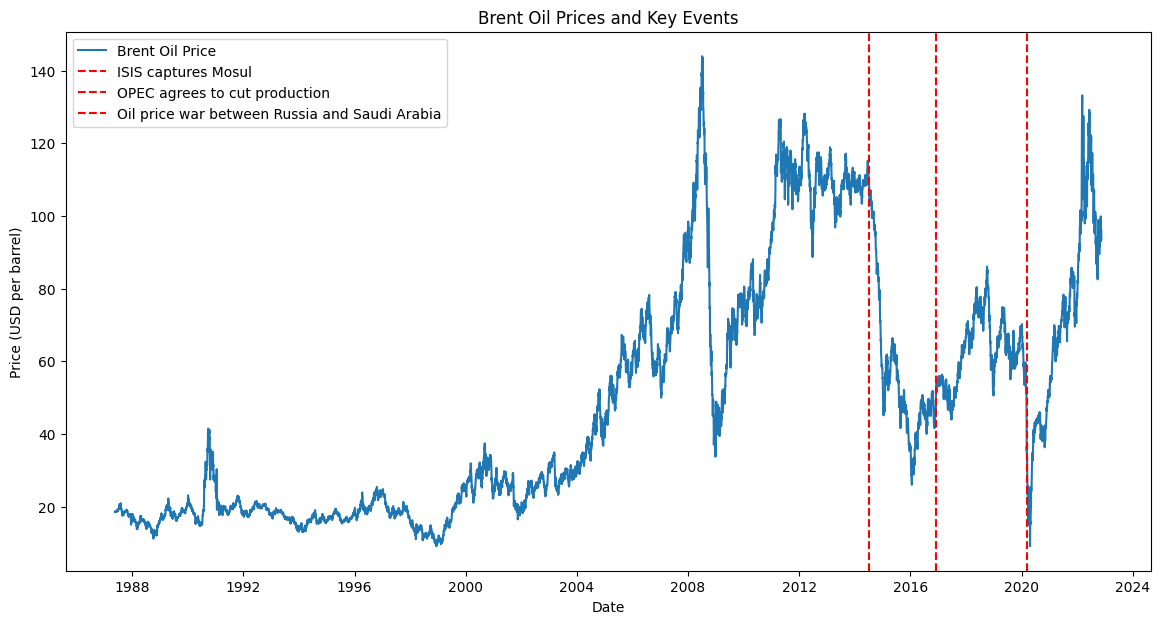

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price')
for event_date, event_name in events.items():
    plt.axvline(pd.to_datetime(event_date), color='r', linestyle='--', label=event_name)
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.title('Brent Oil Prices and Key Events')
plt.legend()
plt.show()


In [10]:
import joblib

# Fit the ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Price'], order=(5, 1, 0))
model_fit = model.fit()

# Save the model to a file
joblib_file = "arima_model.pkl"
joblib.dump(model_fit, joblib_file)


['arima_model.pkl']